<a href="https://colab.research.google.com/github/bchabros/machine_learning_bootcamp/blob/main/supervised/02_linear_regression/03_linear_regression_R2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regresja liniowa R2

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
np.random.seed(42)
np.set_printoptions(precision=6,
                    suppress=True,
                    edgeitems=30,
                    linewidth=120,
                    formatter=dict(float=lambda x: f'{x:.2f}'))
sns.set(font_scale=1.3)
sklearn.__version__

'1.0.1'

In [5]:
from sklearn.datasets import make_regression

data, target = make_regression(n_samples=100,
                               n_features=1,
                               n_targets=1,
                               noise=30.0,
                               random_state=42)
print(f'data shape: {data.shape}')
print(f'target shape: {target.shape}')

data shape: (100, 1)
target shape: (100,)


In [6]:
data[:5]

array([[0.93],
       [0.09],
       [-1.06],
       [0.31],
       [-0.48]])

In [7]:
target[:5]

array([74.59, -37.46, -16.46, 5.35, -13.21])

Obserwacje

[]

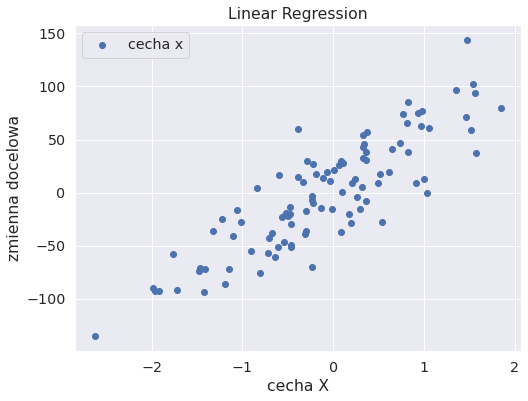

In [8]:
plt.figure(figsize=(8,6))
plt.title('Linear Regression')
plt.xlabel('cecha X')
plt.ylabel('zmienna docelowa')
plt.scatter(data, target, label='cecha x')
plt.legend()
plt.plot()

In [9]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(data, target)

LinearRegression()

In [10]:
#ocena modleu R2
regressor.score(data, target)

0.7426670084336404

In [11]:
y_pred = regressor.predict(data)
y_pred

array([49.90, 7.83, -49.21, 19.15, -20.38, 35.77, -19.60, 30.53, 33.97, 53.50, 44.45, 80.13, 40.29, -7.45, -36.79,
       8.07, -94.15, 29.07, 54.87, -127.04, 28.25, 8.33, -19.71, 49.11, 81.46, 76.53, -26.43, 1.71, -26.49, -56.11,
       21.29, 22.22, 16.50, -22.90, -41.75, 13.30, -11.40, 21.52, 44.48, -11.04, 21.50, -30.24, 79.39, -22.33, -8.17,
       -16.04, -11.51, -28.65, 19.88, 13.90, -12.83, 3.75, -8.17, 77.14, -15.69, 20.62, 20.00, -5.76, -8.19, -95.54,
       19.64, -7.75, -51.63, -31.49, -69.43, 51.76, -82.46, -91.84, -24.52, 41.74, 43.98, -66.88, -70.18, -57.34,
       -38.32, 82.19, 52.11, 15.55, 18.25, -23.63, -84.36, 9.02, 12.03, -62.69, 56.17, -2.27, -19.90, 2.82, -46.97,
       -3.39, -53.86, 71.08, 6.86, -21.51, -19.46, 95.79, -67.50, -32.37, -0.09, -11.91])

Model z obserwacjami

[]

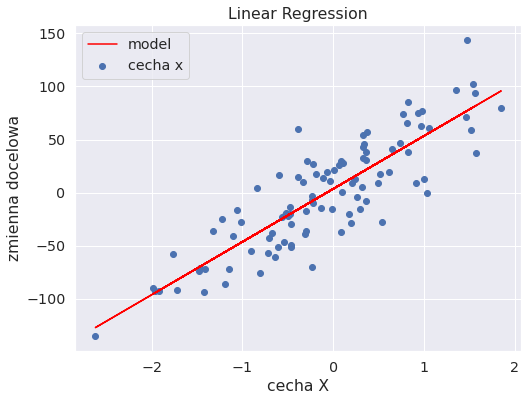

In [12]:
plt.figure(figsize=(8,6))
plt.title('Linear Regression')
plt.xlabel('cecha X')
plt.ylabel('zmienna docelowa')
plt.scatter(data, target, label='cecha x')
plt.plot(data, y_pred, color='red', label='model')
plt.legend()
plt.plot()

Współczynnik R2

((y_true - y_pred) ** 2).sum()

In [14]:
regressor.score(data, target)

0.7426670084336404

In [15]:
[item for item in dir(regressor) if not item.startswith('_')]

['coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [16]:
regressor.coef_

array([49.83])

In [17]:
regressor.intercept_

3.4953459615809175

Końcowa postać modelu

Y = 3.495 + 49.83*X_1


[]

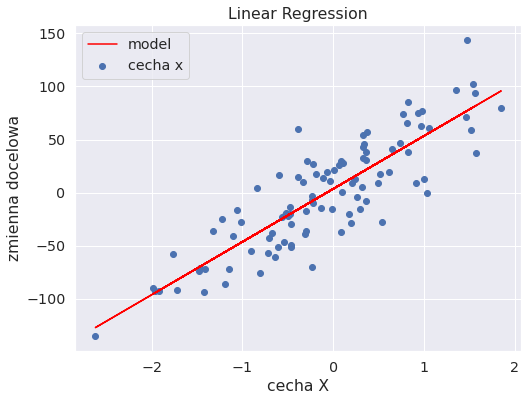

In [18]:
plt.figure(figsize=(8,6))
plt.title('Linear Regression')
plt.xlabel('cecha X')
plt.ylabel('zmienna docelowa')
plt.scatter(data, target, label='cecha x')
plt.plot(data, regressor.intercept_ + regressor.coef_[0] * data, color='red', label='model')
plt.legend()
plt.plot()

Taki sam wykres 

Podzial na train i test

In [20]:
data, target = make_regression(n_samples=1000, n_features=1, n_targets=1, noise=15.0, random_state=42)

print(f'data shape: {data.shape}')
print(f'target shape: {target.shape}')

data shape: (1000, 1)
target shape: (1000,)


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_train shape: {y_train.shape}')

X_train shape: (750, 1)
X_test shape: (250, 1)
y_train shape: (750,)
y_train shape: (750,)


[]

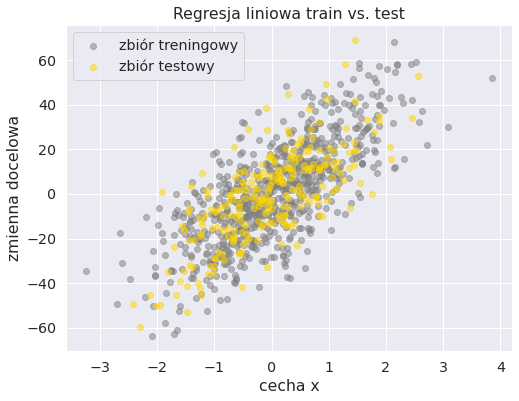

In [23]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa train vs. test')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X_train, y_train, label='zbiór treningowy', color='gray', alpha=0.5)
plt.scatter(X_test, y_test, label='zbiór testowy', color='gold', alpha=0.5)
plt.legend()
plt.plot()

In [24]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

In [25]:
regressor.score(X_train, y_train)

0.5461661060548072

In [26]:
regressor.score(X_test, y_test)

0.5353524180919587

Regresja liniowa zbior treningowy wizualizacja

[]

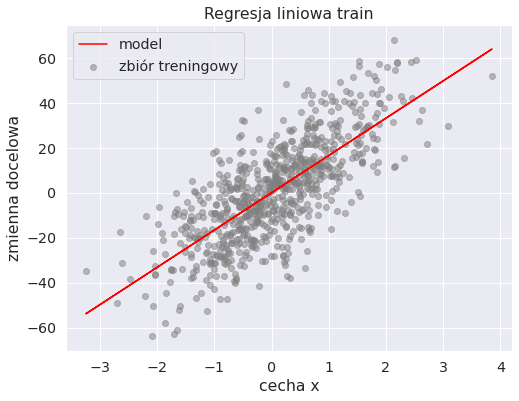

In [29]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa train')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X_train, y_train, label='zbiór treningowy', color='gray', alpha=0.5)
plt.plot(X_train, regressor.intercept_ + regressor.coef_[0]* X_train, label='model', color='red')
plt.legend()
plt.plot()

[]

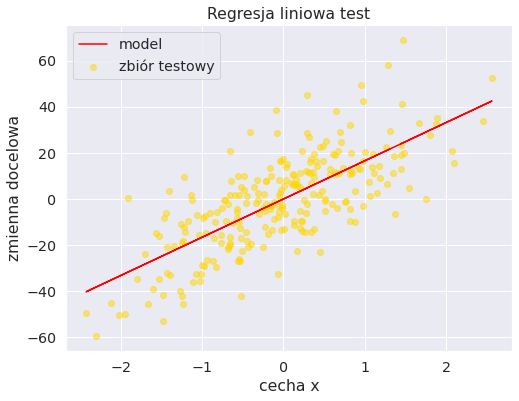

In [32]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa test')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X_test, y_test, label='zbiór testowy', color='gold', alpha=0.5)
plt.plot(X_test, regressor.intercept_ + regressor.coef_[0]* X_test, label='model', color='red')
plt.legend()
plt.plot()

In [34]:
y_pred = regressor.predict(X_test)

predictions = pd.DataFrame(data={'y_true': y_test,
                                 'y_pred': y_pred})
predictions.head()

,y_true,y_pred
0,29.480861,21.724420
1,-14.450323,4.366767
2,4.170250,-0.384236
3,-42.005355,-20.655085
4,7.700672,-10.651968


In [35]:
predictions['error'] = predictions['y_true'] - predictions['y_pred']
predictions.head()

,y_true,y_pred,error
0,29.480861,21.724420,7.756442
1,-14.450323,4.366767,-18.817091
2,4.170250,-0.384236,4.554486
3,-42.005355,-20.655085,-21.350271
4,7.700672,-10.651968,18.352640


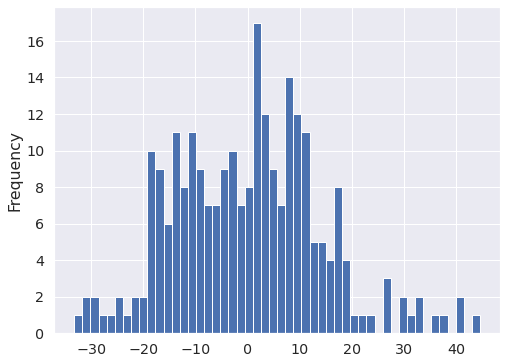

In [36]:
_ = predictions['error'].plot(kind='hist', bins=50, figsize=(8,6))